In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import altair as alt

In [2]:
raw_MNIST = datasets.MNIST(
    "./data", download=True, train=True, transform=transforms.ToTensor()
)


torch.Size([100, 1, 28, 28]) torch.Size([100])


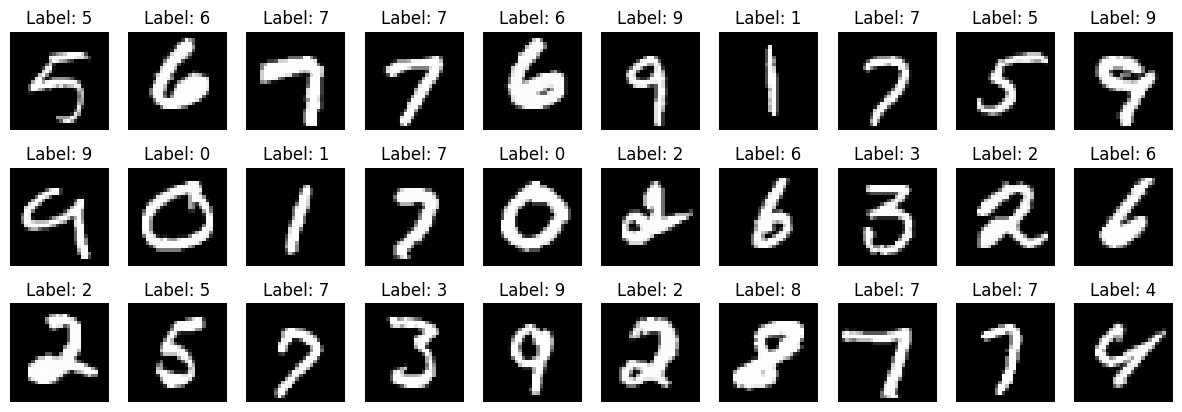

In [3]:
raw_images = DataLoader(raw_MNIST, batch_size=100, shuffle=True)
for images, labels in raw_images:
    print(images.shape, labels.shape)
    break  # Print only the first batch

plt.figure(figsize=(15, 5))
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(images[i].squeeze().numpy(), cmap="gray")
    plt.title(f"Label: {labels[i].item()}")
    plt.axis("off")
plt.show()

Epoch 1/10, Loss: 0.3821
Epoch 2/10, Loss: 0.1777
Epoch 3/10, Loss: 0.1334
Epoch 4/10, Loss: 0.1079
Epoch 5/10, Loss: 0.0912
Epoch 6/10, Loss: 0.0789
Epoch 7/10, Loss: 0.0684
Epoch 8/10, Loss: 0.0642
Epoch 9/10, Loss: 0.0571
Epoch 10/10, Loss: 0.0521
Test Accuracy: 97.73%


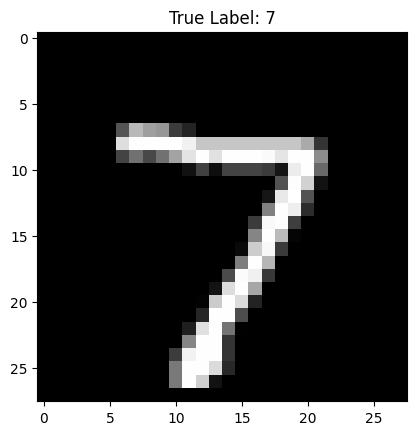

Predicted Digit: 7


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 2: Load the MNIST dataset
# Define a transform to normalize the data
transform = transforms.Compose(
    [
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize((0.5,), (0.5,)),  # Normalize pixel values to range [-1, 1]
    ]
)

# Download and load the training and test datasets
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# Step 3: Define the neural network model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()  # Flatten 28x28 image into a 1D vector of 784
        self.fc1 = nn.Linear(28 * 28, 128)  # Fully connected layer with 128 neurons
        self.fc2 = nn.Linear(128, 64)  # Fully connected layer with 64 neurons
        self.fc3 = nn.Linear(64, 10)  # Output layer with 10 neurons (digits 0-9)
        self.relu = nn.ReLU()  # ReLU activation function
        self.softmax = nn.LogSoftmax(dim=1)  # LogSoftmax for output probabilities

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x


model = NeuralNet()

# Step 4: Define the loss function and optimizer
criterion = nn.NLLLoss()  # Negative log likelihood loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the model
epochs = 10
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        output = model(images)  # Forward pass
        loss = criterion(output, labels)  # Calculate the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Step 6: Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to calculate gradients during evaluation
    for images, labels in test_loader:
        output = model(images)
        _, predicted = torch.max(output, 1)  # Get the index of the highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Step 7: Test with a new image (optional)
# Visualize a sample image from the test set
dataiter = iter(test_loader)
images, labels = next(dataiter)
plt.imshow(images[0].view(28, 28).numpy(), cmap="gray")
plt.title(f"True Label: {labels[0].item()}")
plt.show()

# Predict the digit
output = model(images[0].unsqueeze(0))  # Add batch dimension
predicted = torch.argmax(output).item()
print(f"Predicted Digit: {predicted}")

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt


# Visualize a batch of input images from the dataset
def show_sample_images(data_loader, num_images=10):
    # Get a batch of images and labels
    images, labels = next(iter(data_loader))

    # Plot the specified number of images
    plt.figure(figsize=(12, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(
            images[i].squeeze(), cmap="gray"
        )  # Remove channel dimension, grayscale
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.show()


# Display training samples
print("Training Samples:")
show_sample_images(train_loader, num_images=10)

# Display test samples
print("Test Samples:")
show_sample_images(test_loader, num_images=10)

In [4]:
def images_to_df(data_loader, num_images=10):
    images, labels = next(iter(data_loader))
    data = []
    for i in range(num_images):
        img = images[i].squeeze().numpy()
        label = labels[i].item()
        data.append({"image": img, "label": label})
    return pl.DataFrame(data)


# Function to plot images using Altair
def show_sample_images_altair(data_loader, num_images=10):
    df = images_to_df(data_loader, num_images)
    charts = []
    for i in range(num_images):
        chart = (
            alt.Chart(df.iloc[[i]])
            .mark_image(width=28, height=28)
            .encode(url="image", tooltip="label")
            .properties(title=f"Label: {df.iloc[i]['label']}")
        )
        charts.append(chart)
    return alt.hconcat(*charts)


# Display training samples
print("Training Samples:")
show_sample_images_altair(train_loader, num_images=10).display()

# Display test samples
print("Test Samples:")
show_sample_images_altair(test_loader, num_images=10).display()

Training Samples:


NameError: name 'train_loader' is not defined